# GPU Specifications Analysis

*Graphics Processing Units* (GPUs) are essential components in modern computing, powering everything from gaming and AI to scientific simulations. Analyzing GPU specifications helps in understanding their performance capabilities, efficiency, and technological advancements over time.

This analysis focuses on key GPU attributes such as memory size, clock speeds, shader cores, and bus interfaces. By examining trends across different manufacturers and generations, we can gain insights into the evolution of GPUs and their impact on computing performance.

# 1. Dataset selection and Description

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

gpu_filepath = r"D:\pdfs\NvidiavsAMD\gpu_specs_v7.csv"
gpu_data = pd.read_csv(gpu_filepath)

In [66]:
num_rows, num_cols = gpu_data.shape
col_names = gpu_data.columns.tolist()

num_rows, num_cols, col_names

(3056,
 16,
 ['manufacturer',
  'productName',
  'releaseYear',
  'memSize',
  'memBusWidth',
  'gpuClock',
  'memClock',
  'unifiedShader',
  'tmu',
  'rop',
  'pixelShader',
  'vertexShader',
  'igp',
  'bus',
  'memType',
  'gpuChip'])

In [67]:
gpu_data.head()

,manufacturer,productName,releaseYear,memSize,memBusWidth,gpuClock,memClock,unifiedShader,tmu,rop,pixelShader,vertexShader,igp,bus,memType,gpuChip
0,NVIDIA,GeForce RTX 5090,2025.0,28.0,448.0,900,1200.0,8192.0,256,128,NaN,NaN,No,PCIe 4.0 x16,HBM2e,Arctic Sound
1,NVIDIA,GeForce RTX 5080,2025.0,16.0,256.0,900,1215.0,6912.0,432,192,NaN,NaN,No,PCIe 4.0 x16,HBM2e,GA100
2,NVIDIA,GeForce RTX 5070,2025.0,12.0,192.0,1825,2000.0,5120.0,320,128,NaN,NaN,No,PCIe 4.0 x16,GDDR6,Navi 21
3,NVIDIA,GeForce RTX 5060 Mobile,2025.0,8.0,128.0,2235,2500.0,4608.0,144,48,NaN,NaN,No,PCIe 5.0 x16,GDDR7,GB206
4,NVIDIA,GeForce RTX 5060,2025.0,8.0,128.0,1825,2250.0,4608.0,288,192,NaN,NaN,No,PCIe 4.0 x16,GDDR6,Navi 31


### Context: 
This dataset contains specifications of various GPUs from different manufacturers, including their release year, memory details, clock speeds, and shader information.
Number of Rows and Columns: 3,056 rows × 16 columns.

### Key Columns:
*manufacturer*: Brand of the GPU (e.g., NVIDIA, AMD).\
*productName*: Model name of the GPU.\
*releaseYear*: Year the GPU was released.\
*memSize*: Memory size (GB).\
*memBusWidth*: Memory bus width (bits).\
*gpuClock*: GPU clock speed (MHz).\
*memClock*: Memory clock speed (MHz).\
*unifiedShader*: Number of unified shader cores.\
*tmu*: Number of texture mapping units.\
*rop*: Number of render output units.\
*bus*: Type of PCIe connection.\
*memType*: Memory type (e.g., GDDR6, HBM2).\
*gpuChip*: Codename of the GPU chip.

# 2. Distribution and Relationship Plots

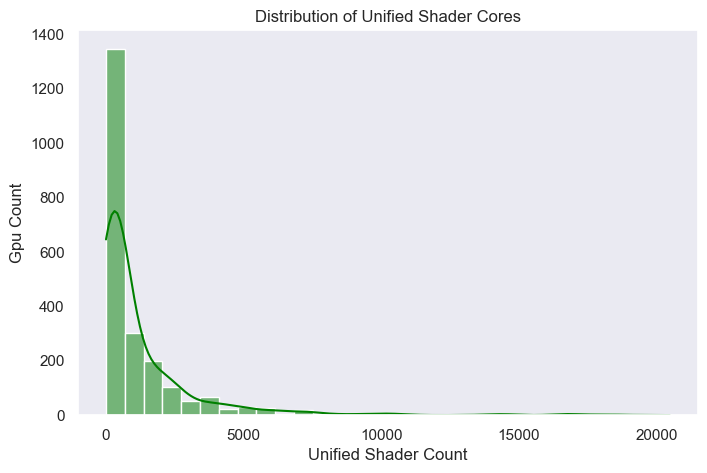

In [86]:
# Histogram for a numeric variable (GPU Unified Shader Core)
plt.figure(figsize=(8,5))

sns.histplot(gpu_data['unifiedShader'], bins=30, kde=True, color='green')
plt.title("Distribution of Unified Shader Cores")
plt.xlabel("Unified Shader Count")
plt.ylabel("Gpu Count")
plt.show()

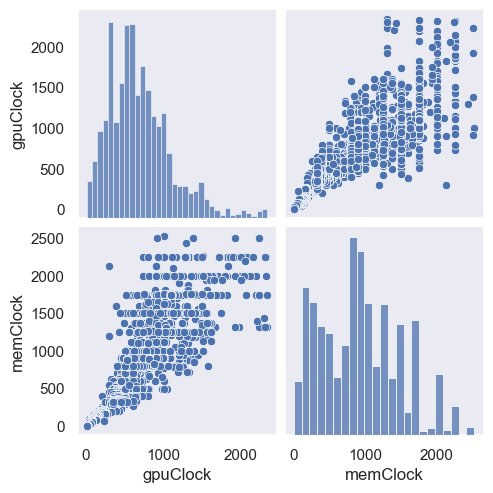

In [69]:
# Pairplot for Numerical Values
sns.pairplot(gpu_data[['gpuClock', 'memClock']])
plt.show()

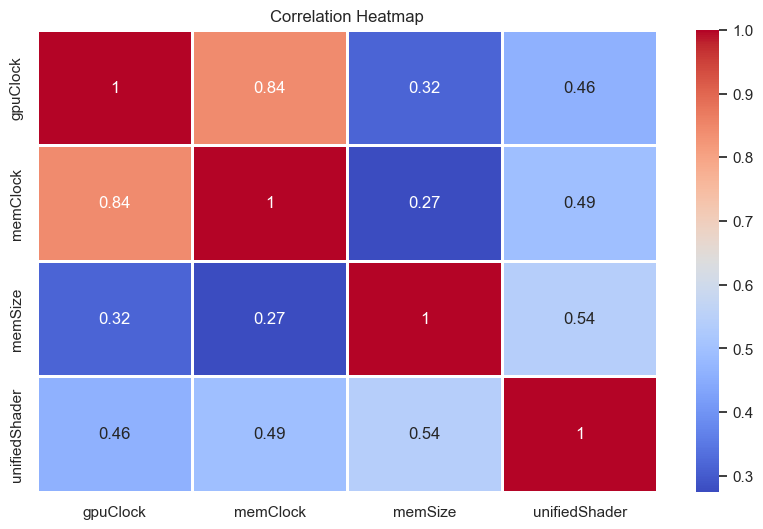

In [70]:
# Heatmap for correlations
plt.figure(figsize=(10,6))
sns.heatmap(gpu_data[['gpuClock', 'memClock', 'memSize', 'unifiedShader']].corr(), annot=True, cmap='coolwarm', linewidth=0.75)
plt.title("Correlation Heatmap")
plt.show()

<Figure size 1000x600 with 0 Axes>

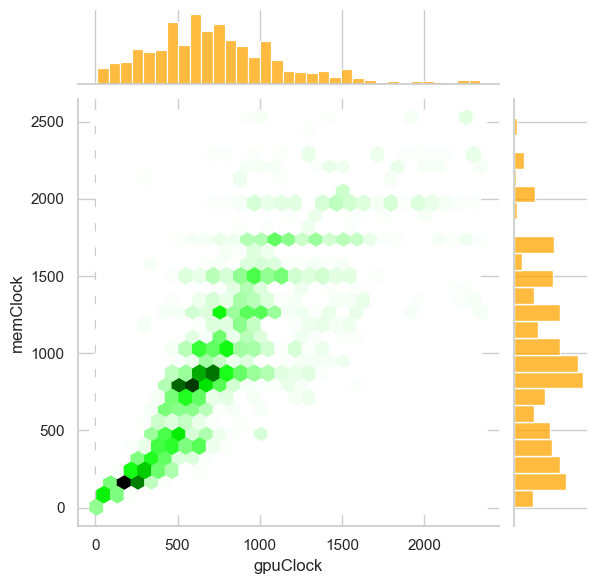

In [90]:
# Jointplot for GPU clock vs. Memory clock
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.jointplot(x='gpuClock', y='memClock', data=gpu_data, kind='hex', marginal_kws=dict(color='orange'), color='green')
plt.show()

# 3. Categorical Data Visualisation

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18176\4044170530.py:6: UserWarning: The palette list has more values (3056) than needed (8), which may not be intended.
  sns.countplot(data=gpu_data, x='manufacturer', order=gpu_data['manufacturer'].value_counts().index, hue='manufacturer', palette=Palette, legend=False)


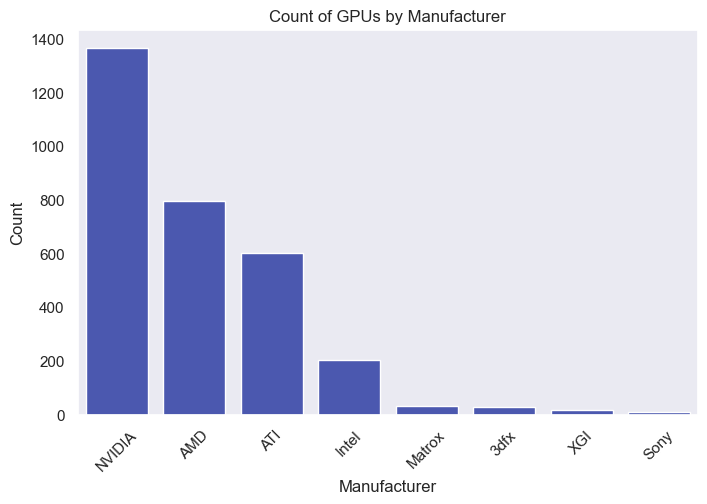

In [81]:
# Bar plot: Count of GPUs by Manufacturer
plt.figure(figsize=(8,5))
Palette = sns.color_palette("coolwarm", len(gpu_data['manufacturer']))
sns.set(style='dark', color_codes=True)

sns.countplot(data=gpu_data, x='manufacturer', order=gpu_data['manufacturer'].value_counts().index, hue='manufacturer', palette=Palette, legend=False)

plt.xticks(rotation=45)
plt.title("Count of GPUs by Manufacturer")
plt.xlabel("Manufacturer")
plt.ylabel("Count")
plt.show()

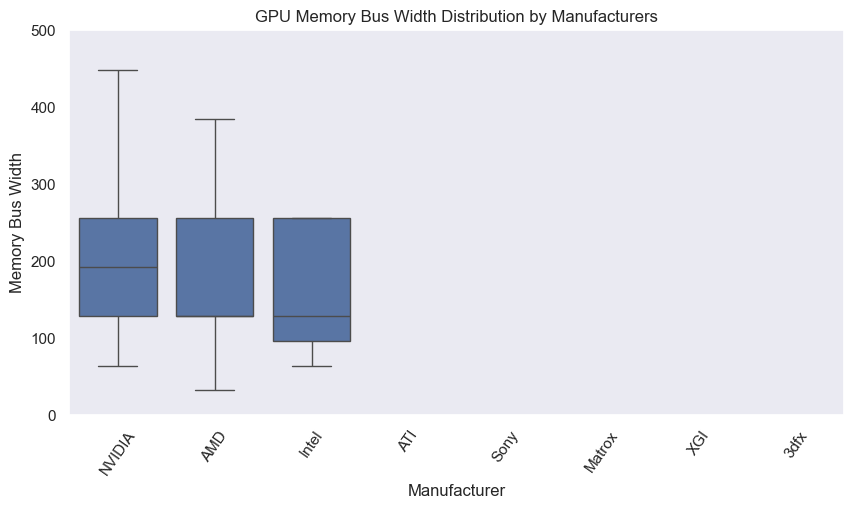

In [84]:
# Box Plot: Memory Bus Width by Manufacturer
plt.figure(figsize=(10,5))
sns.boxplot(x='manufacturer', y='memBusWidth', data=gpu_data)
plt.ylim(0,500)
plt.xticks(rotation=55)
plt.title("GPU Memory Bus Width Distribution by Manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Memory Bus Width")
plt.show()

### Insights & Observations:
 - The histogram shows that the majority of GPUs have lower unified shader counts (clustered towards the left). A long tail extends towards higher values, indicating some high-end GPUs.
 - The pairplot reveals possible relationships between GPU clock and  memory clock
 - The heatmap highlights strong correlations between unified shaders and other performance metrics.
 - The jointplot indicates a positive relationship between GPU clock and memory clock.
 - *NVIDIA* and *AMD* dominate the market as seen in the bar plot.
 - The box plot suggests *NVIDIA* GPUs generally have higher memory bus width compared to other brands.